<a href="https://colab.research.google.com/github/naftaltomisiano/House-Price-Prediction/blob/main/Copy_of_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("housing.csv")

In [ ]:
data.corr()

<ipython-input-3-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split 
x=data.drop(["median_house_value"], axis=1)
y=data["median_house_value"]

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8650,-118.39,33.86,28.0,3619.0,764.0,1735.0,789.0,6.1404,<1H OCEAN,368400.0
18367,-122.01,37.18,37.0,3852.0,652.0,1534.0,567.0,5.8596,<1H OCEAN,318700.0
7170,-118.19,34.06,37.0,1715.0,456.0,2052.0,440.0,2.3125,<1H OCEAN,116100.0
11731,-120.81,39.02,30.0,806.0,189.0,326.0,146.0,2.8155,INLAND,101000.0
1838,-122.30,37.90,30.0,1772.0,471.0,880.0,437.0,2.2672,NEAR BAY,162500.0
...,...,...,...,...,...,...,...,...,...,...
13415,-117.42,34.06,27.0,2532.0,495.0,1305.0,436.0,2.9107,INLAND,143100.0
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190,<1H OCEAN,163300.0
15753,-122.45,37.77,52.0,2296.0,509.0,1039.0,472.0,4.1417,NEAR BAY,500000.0
19736,-121.78,40.12,14.0,388.0,108.0,35.0,17.0,6.1359,INLAND,106300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

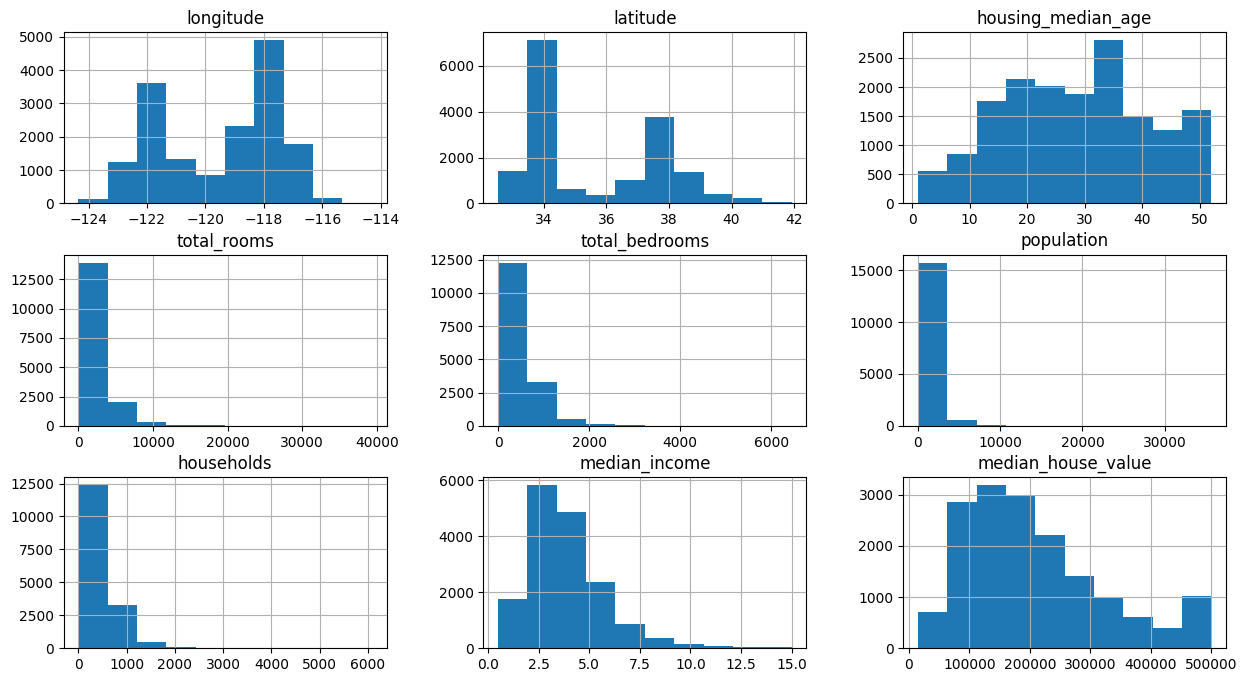

In [ ]:
train_data.hist(figsize=(15,8))

<ipython-input-15-020f9dbf1867>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), center=0, cmap='Blues')


<Axes: >

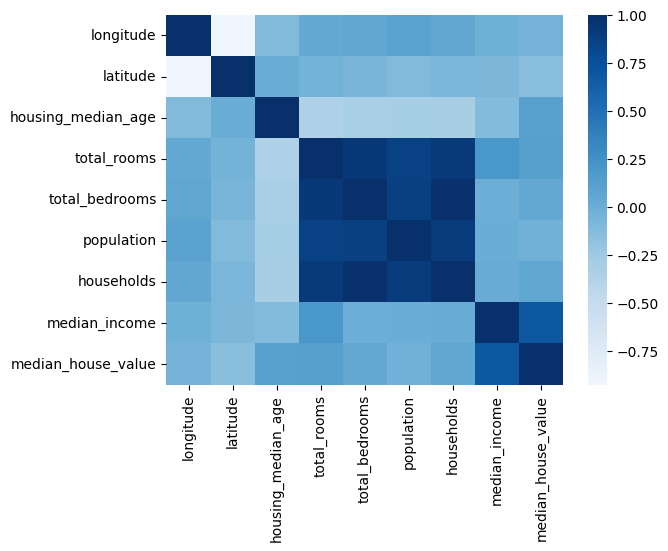

In [ ]:
plt.figure
sns.heatmap(train_data.corr(), center=0, cmap='Blues')


In [ ]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+ 1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+ 1)
train_data["population"]=np.log(train_data["population"]+ 1)
train_data["households"]=np.log(train_data["households"]+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

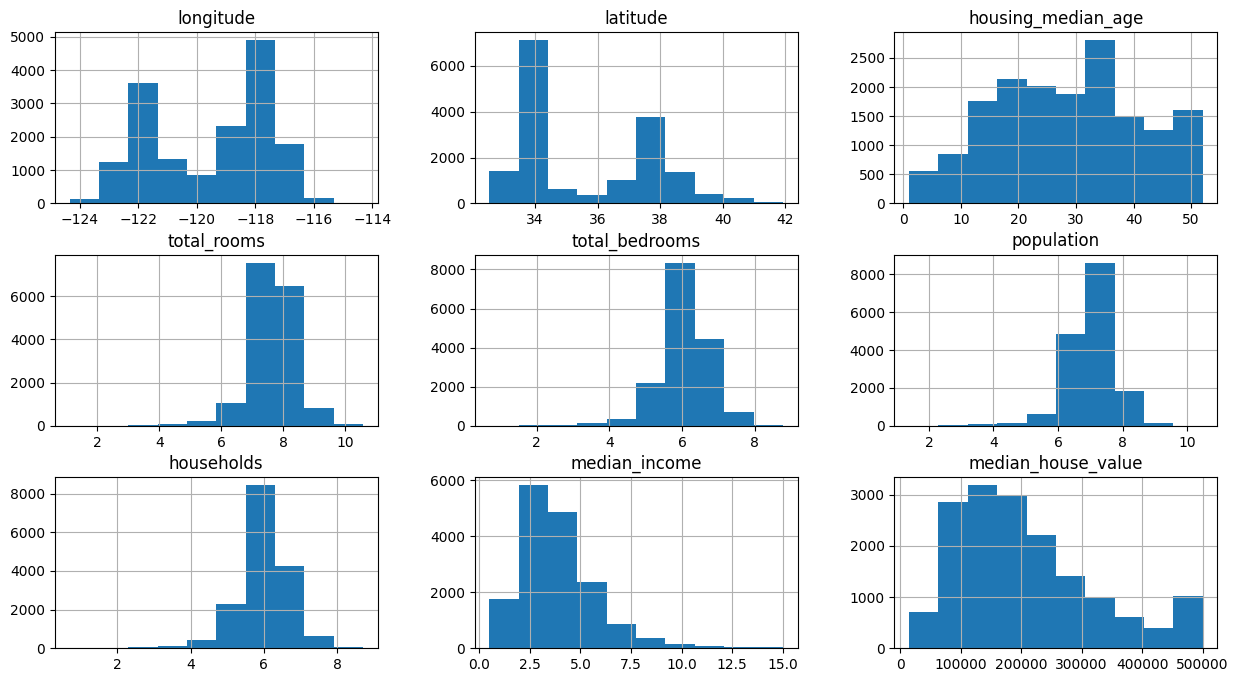

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7250
INLAND        5208
NEAR OCEAN    2084
NEAR BAY      1801
ISLAND           3
Name: ocean_proximity, dtype: int64

In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8650,-118.39,33.86,28.0,8.194229,6.639876,7.459339,6.672033,6.1404,368400.0,1,0,0,0,0
18367,-122.01,37.18,37.0,8.256607,6.481577,7.336286,6.342121,5.8596,318700.0,1,0,0,0,0
7170,-118.19,34.06,37.0,7.447751,6.124683,7.627057,6.089045,2.3125,116100.0,1,0,0,0,0
11731,-120.81,39.02,30.0,6.693324,5.247024,5.789960,4.990433,2.8155,101000.0,0,1,0,0,0
1838,-122.30,37.90,30.0,7.480428,6.156979,6.781058,6.082219,2.2672,162500.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,-117.42,34.06,27.0,7.837160,6.206576,7.174724,6.079933,2.9107,143100.0,0,1,0,0,0
6251,-117.97,34.04,32.0,7.318540,5.690359,7.190676,5.783825,4.1190,163300.0,1,0,0,0,0
15753,-122.45,37.77,52.0,7.739359,6.234411,6.946976,6.159095,4.1417,500000.0,0,0,0,1,0
19736,-121.78,40.12,14.0,5.963579,4.691348,3.583519,2.890372,6.1359,106300.0,0,1,0,0,0


<ipython-input-21-efd5c00b5d59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns. heatmap(data.corr(), center=0, cmap='Blues')


<Axes: >

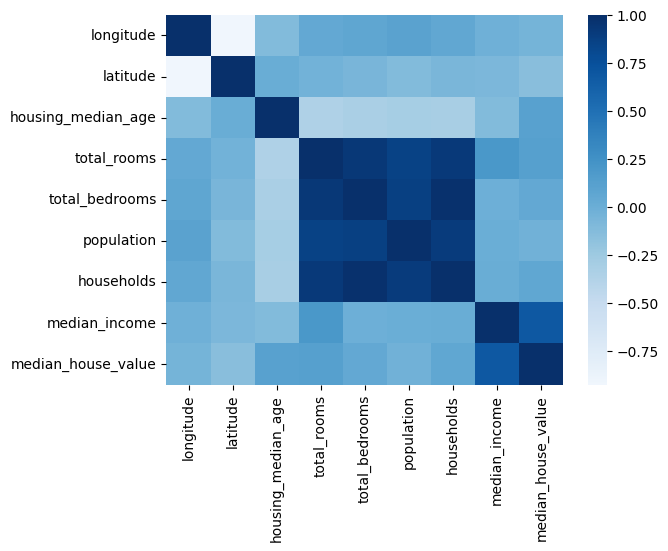

In [ ]:
plt.figure
sns. heatmap(data.corr(), center=0, cmap='Blues')


<Axes: xlabel='latitude', ylabel='longitude'>

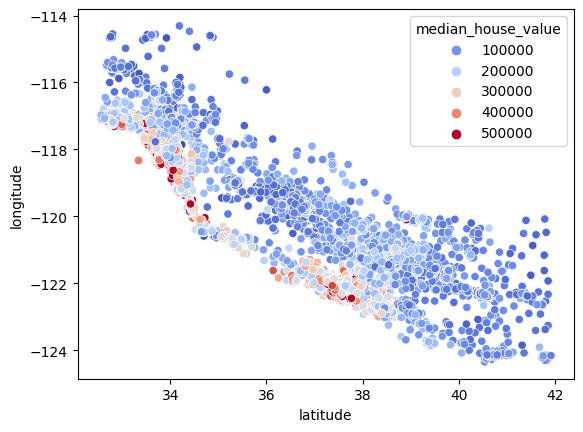

In [ ]:
plt.figure
sns.scatterplot(x="latitude", y="longitude", data=train_data , hue="median_house_value", palette="coolwarm" )

In [ ]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households']=train_data['total_rooms']/train_data['households']

<ipython-input-24-efd5c00b5d59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns. heatmap(data.corr(), center=0, cmap='Blues')


<Axes: >

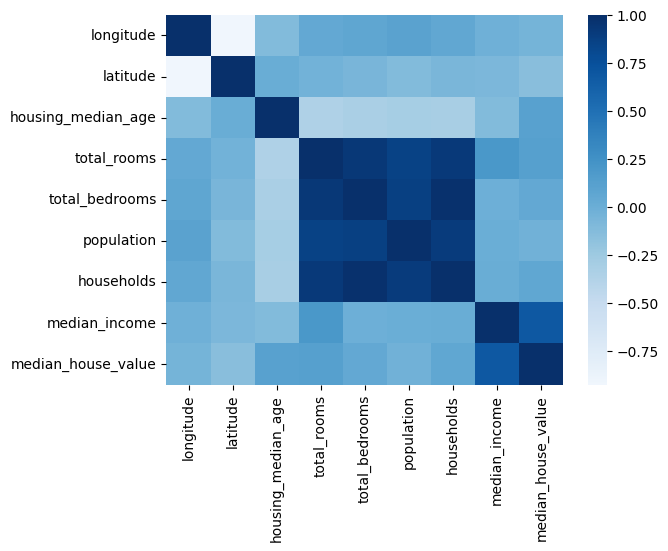

In [ ]:
plt.figure
sns. heatmap(data.corr(), center=0, cmap='Blues')

In [ ]:
test_data=x_test.join(y_test)

test_data["total_rooms"]=np.log(test_data["total_rooms"]+ 1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+ 1)
test_data["population"]=np.log(test_data["population"]+ 1)
test_data["households"]=np.log(test_data["households"]+ 1)


test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households']=test_data['total_rooms']/test_data['households']



In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
10574,-117.70,33.72,6.0,5.356586,3.951244,4.836282,1.407161,1.9659,500001.0,1,0,0,0,0,0.737642
19023,-121.98,38.34,18.0,8.262817,6.821107,7.777793,1.221192,2.5938,129500.0,0,1,0,0,0,0.825518
3745,-118.40,34.16,34.0,7.878155,6.364751,7.048386,1.247817,4.2989,364700.0,1,0,0,0,0,0.807899
19157,-122.69,38.36,6.0,8.611958,7.226209,7.825245,1.216085,2.4827,177500.0,1,0,0,0,0,0.839090
6513,-118.03,34.06,36.0,6.926577,5.723585,7.176255,1.219431,2.1453,162100.0,1,0,0,0,0,0.826322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,-118.38,33.87,17.0,7.934513,6.363028,7.291656,1.245626,5.7415,321900.0,1,0,0,0,0,0.801943
5230,-118.24,33.93,37.0,6.935370,5.556828,6.715383,1.256988,1.5132,86300.0,1,0,0,0,0,0.801230
8931,-118.47,34.00,42.0,7.148346,5.710427,6.354370,1.244012,3.1304,340500.0,1,0,0,0,0,0.798846
5575,-118.31,33.84,5.0,8.177516,6.768493,7.994970,1.224483,2.6491,216700.0,1,0,0,0,0,0.827696


In [ ]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
10574,-117.70,33.72,6.0,5.356586,3.951244,4.836282,1.407161,1.9659,500001.0,1,0,0,0,0,0.737642
19023,-121.98,38.34,18.0,8.262817,6.821107,7.777793,1.221192,2.5938,129500.0,0,1,0,0,0,0.825518
3745,-118.40,34.16,34.0,7.878155,6.364751,7.048386,1.247817,4.2989,364700.0,1,0,0,0,0,0.807899
19157,-122.69,38.36,6.0,8.611958,7.226209,7.825245,1.216085,2.4827,177500.0,1,0,0,0,0,0.839090
6513,-118.03,34.06,36.0,6.926577,5.723585,7.176255,1.219431,2.1453,162100.0,1,0,0,0,0,0.826322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,-118.38,33.87,17.0,7.934513,6.363028,7.291656,1.245626,5.7415,321900.0,1,0,0,0,0,0.801943
5230,-118.24,33.93,37.0,6.935370,5.556828,6.715383,1.256988,1.5132,86300.0,1,0,0,0,0,0.801230
8931,-118.47,34.00,42.0,7.148346,5.710427,6.354370,1.244012,3.1304,340500.0,1,0,0,0,0,0.798846
5575,-118.31,33.84,5.0,8.177516,6.768493,7.994970,1.224483,2.6491,216700.0,1,0,0,0,0,0.827696


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s, y_train)


LinearRegression()

In [ ]:
x_test_s=scaler.transform(x_test)

In [ ]:
x_test_s

array([[ 0.93326481, -0.89532563, -1.80427029, ..., -0.35188438,
        -0.38225981, -1.48771917],
       [-1.20440999,  1.26974792, -0.85083538, ..., -0.35188438,
        -0.38225981,  0.91984996],
       [ 0.5836451 , -0.68912815,  0.42041117, ..., -0.35188438,
        -0.38225981,  0.43711585],
       ...,
       [ 0.54868313, -0.76410905,  1.05603445, ..., -0.35188438,
        -0.38225981,  0.18909762],
       [ 0.62859621, -0.83908996, -1.8837232 , ..., -0.35188438,
        -0.38225981,  0.9794969 ],
       [-0.83481201,  1.48063171, -1.08919411, ..., -0.35188438,
        -0.38225981, -0.15985592]])

In [ ]:
reg.score(x_test_s, y_test)

0.6627552943224969

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)


RandomForestRegressor()

In [ ]:
forest.score(x_test,y_test)

0.8083330498795801

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# generate some data
X, y = make_regression()

# define the parameter grid
param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

# create a random forest regressor
forest = RandomForestRegressor()

# create a grid search object
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# fit the grid search object to the data
grid_search.fit(X, y)

# get the best estimator
best_forest = grid_search.best_estimator_

# print the parameters of the best estimator
print(best_forest.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
